In [11]:
# !pip3 install spacy
# !python3 -m spacy download en_core_web_lg
!pip3 install yake

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import spacy
import numpy as np
import pandas as pd
import yake
import matplotlib.pyplot as plt

In [13]:
PATH = "./data.csv"
data = pd.read_csv(PATH)
data.head()
data = data.dropna()

In [14]:
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20
kw_extractor = yake.KeywordExtractor(lan=language, n=1, dedupLim=0.9, dedupFunc='seqm', windowsSize=1)

for index, row in data.iterrows():
    keywords = kw_extractor.extract_keywords(row['product_title'])
    searchability_score = (0.1 * len(keywords)) + 0.9 * np.mean([1 - kw[1] for kw in keywords])
    data.at[index, 'searchability'] = searchability_score

/home/hegemon/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hegemon/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [15]:
data = data.sort_values(by='searchability', ascending=False)
data['searchability'] = data['searchability'] / data['searchability'].max()

In [16]:
data[data['searchability'] > 0.9]

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,availability_status,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,searchability
15918,15919,"Sanitizer Spray - Air & Surface Disinfectant, ...",Beauty & Hygiene,Bath & Hand Wash,Godrej Aer,199.00,199.0,Hand Wash & Sanitizers,3.9,Godrej aer Air & Surface Sanitizer Spray is a ...,In Stock,21,Summer,No,3.407798,Individual,Female,1.000000
12864,12865,Biodegradable Super Soft Black Sanitary Napkin...,Beauty & Hygiene,Feminine Hygiene,Sirona,226.59,249.0,Sanitary Napkins,1.0,Who am I? I am Sirona's Black Pad. I am made w...,In Stock,88,Winter,Yes,0.592459,Individual,Other,0.996867
17556,17557,"Gift Box - Assorted Nut & Seed Butters, Dairy ...",Gourmet & World Food,"Sauces, Spreads & Dips",Jus Amazin,399.00,500.0,"Chocolate, Peanut Spread",3.2,This assorted nut and seed butter gift box is ...,In Stock,23,Summer,No,2.149013,Bundle,Female,0.970137
3140,3141,"Post Hair Removal Soother - BIO Chlorophyll, O...",Beauty & Hygiene,Feminine Hygiene,BIOTIQUE,149.25,199.0,Hair Removal,4.4,"This refreshing, anti-baterial moisturizer is ...",In Stock,61,Spring,Yes,4.961404,Individual,Female,0.966147
20893,20894,Germ Protection Fruit & Veggie Wash – Natural ...,Cleaning & Household,All Purpose Cleaners,Godrej Protekt,199.20,249.0,Disinfectant Spray & Cleaners,4.0,Godrej Protekt Germ Protection Fruit & Veggie ...,In Stock,81,Winter,Yes,3.088472,Bundle,Female,0.965543
13355,13356,Biodegradable Super Soft Black Sanitary Napkin...,Beauty & Hygiene,Feminine Hygiene,Sirona,235.69,259.0,Sanitary Napkins,4.4,Who am I? I am Sirona's Black Pad. I am made w...,In Stock,10,Autumn,No,1.335912,Bundle,Female,0.953189
13468,13469,Doraemon Polycarbonate Sports Plastic Sipper B...,"Kitchen, Garden & Pets",Storage & Accessories,Yellow Spark,299.00,349.0,Water & Fridge Bottles,3.0,This bottle comes with ABS plastic top cover w...,In Stock,4,Autumn,No,4.475749,Bundle,Other,0.946836
14863,14864,"Melts Whole Grain Snack - Carrot & Cumin, Appl...",Baby Care,Baby Food & Formula,Timios,475.00,475.0,Baby Food,4.0,Timios Melts snacks are delicious whole grain ...,In Stock,63,Winter,Yes,0.648293,Bundle,Female,0.926448
3791,3792,Chai/Tea/coffee Cup Bonechina & Saucer - White...,"Kitchen, Garden & Pets",Crockery & Cutlery,BP Bharat,689.00,979.0,"Cups, Mugs & Tumblers",2.0,Enjoy your favourite beverages in this beautif...,In Stock,95,Autumn,No,4.596700,Bundle,Other,0.925666
25981,25982,Anti-bacterial Skin Wipes - Kills 99.9% Germs ...,Beauty & Hygiene,Skin Care,Godrej Protekt,102.00,120.0,Face Care,4.1,Godrej Protekt Anti-bacterial Skin Wipes kills...,In Stock,73,Spring,No,0.501066,Bundle,Male,0.925166


(array([3.100e+01, 1.757e+03, 8.640e+02, 3.940e+03, 3.657e+03, 1.555e+03,
        2.264e+03, 2.004e+03, 9.760e+02, 4.050e+02, 7.000e+02, 3.090e+02,
        1.440e+02, 1.060e+02, 8.000e+01, 2.100e+01, 1.100e+01, 7.000e+00,
        4.000e+00, 3.000e+00]),
 array([0.37048584, 0.40196155, 0.43343726, 0.46491297, 0.49638868,
        0.52786438, 0.55934009, 0.5908158 , 0.62229151, 0.65376721,
        0.68524292, 0.71671863, 0.74819434, 0.77967005, 0.81114575,
        0.84262146, 0.87409717, 0.90557288, 0.93704858, 0.96852429,
        1.        ]),
 <BarContainer object of 20 artists>)

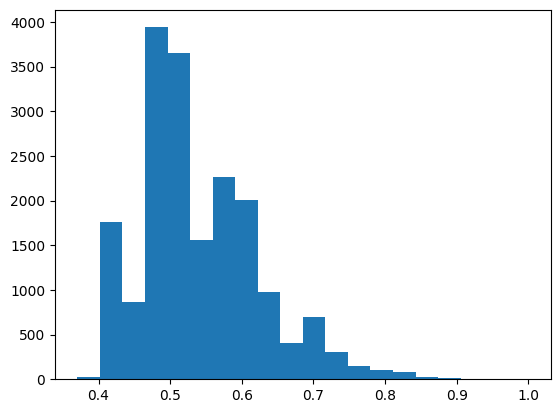

In [17]:
plt.hist(data['searchability'], bins=20)

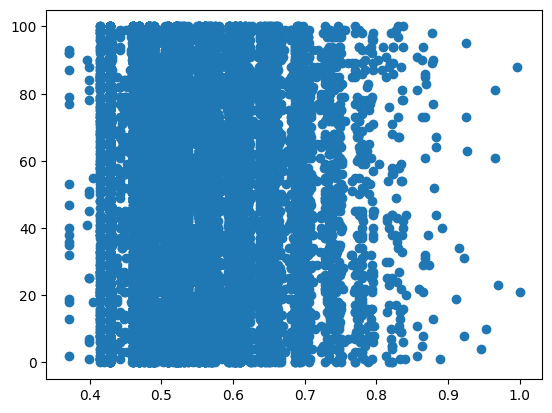

In [18]:
plt.scatter(data['searchability'], data['customer_reviews_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x71a86d343250>,
 'caps': [<matplotlib.lines.Line2D at 0x71a86d343790>,
 'boxes': [<matplotlib.lines.Line2D at 0x71a86d343100>],
 'medians': [<matplotlib.lines.Line2D at 0x71a86d343cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x71a86d343f70>],
 'means': []}

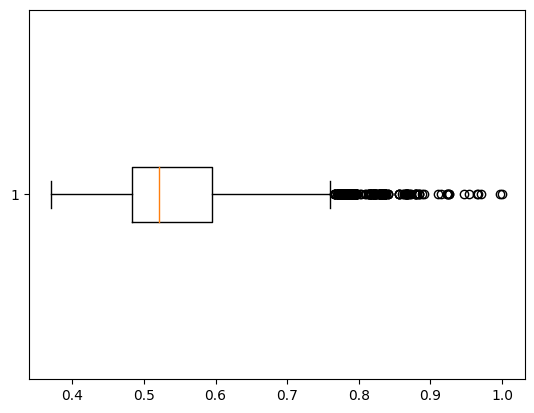

In [26]:
plt.boxplot(data['searchability'], vert=False)

In [25]:
data = data.dropna()
data['searchability']

15918    1.000000
12864    0.996867
17556    0.970137
3140     0.966147
20893    0.965543
           ...   
13715    0.370486
8602     0.370486
2234     0.370486
4096     0.370486
12401    0.370486
Name: searchability, Length: 18838, dtype: float64

In [19]:
data.to_csv('output.csv', index=False)
